# Texi Fare Prediction

The Objective of this Project is to Predict the Fare Price for the Texi ride by given Distance

### Exploratory Data Analysis

In [1]:
# ignore the Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Visualization and Manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading The Dataset

In [2]:
train_cab = pd.read_csv("Data/training_set.csv")
test_cab = pd.read_csv("Data/test.csv")

In [3]:
train_cab

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
16062,6.5,2014-12-12 07:41:00 UTC,-74.008820,40.718757,-73.998865,40.719987,1
16063,16.1,2009-07-13 07:58:00 UTC,-73.981310,40.781695,-74.014392,40.715527,2
16064,8.5,2009-11-11 11:19:07 UTC,-73.972507,40.753417,-73.979577,40.765495,1
16065,8.1,2010-05-11 23:53:00 UTC,-73.957027,40.765945,-73.981983,40.779560,1


Chacking the Shape of the Data
Line and Column

In [4]:
train_cab.shape

(16067, 7)

16067 Rows & 7 Columns in Training Data

In [5]:
test_cab.shape

(9914, 6)

9914 Rows & 6 Columns in Test Data

In [6]:
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


### Data Attributes in Dataset :
1. Pickup Datetime = timestamp value when the Ride Started
2. Pickup Longitude = float for longitude Coordinate of where the cab ride Started
3. Pickup Latitude = Float for latitude Coordinate of where the cab ride Started
4. Dropoff Longitude = float for longitude Coordinate of where the cab ride Ended
5. Dropoff Latitude = Float for latitude Coordinate of where the cab ride ended
6. Passenger Count = Integer indicating the Number of passengers in the cab ride 

Checking The Datatypes of Columns

In [7]:
train_cab.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

### Findings :
The Attribute Date_time is object it needs to convert into timestamp

In [8]:
train_cab.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16067.000000,16067.000000
mean,11.292713,-72.462787,39.914725,-72.462328,39.897906,1.643742
std,9.624025,10.578384,6.826587,10.575062,6.187087,1.267398
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963642,40.768014,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


## Findings :
There are 7 variables in the Dataset
From the Summery of the Dataset we can see
-------------------NOT COMPLETED----------------

In [9]:
test_cab.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [10]:
test_cab.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [11]:
train_cab['pickup_datetime']

0        2009-06-15 17:26:21 UTC
1        2010-01-05 16:52:16 UTC
2        2011-08-18 00:35:00 UTC
3        2012-04-21 04:30:42 UTC
4        2010-03-09 07:51:00 UTC
                  ...           
16062    2014-12-12 07:41:00 UTC
16063    2009-07-13 07:58:00 UTC
16064    2009-11-11 11:19:07 UTC
16065    2010-05-11 23:53:00 UTC
16066    2011-12-14 06:24:33 UTC
Name: pickup_datetime, Length: 16067, dtype: object

In [12]:
train_cab['pickup_datetime'].dtype

dtype('O')

We have Pickup time in Object Format we need to Change it to Datetime

In [13]:
#coerce = unrange value will set to Nan
train_cab['pickup_datetime'] = pd.to_datetime(train_cab['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC',errors= 'coerce')

In [14]:
train_cab.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [15]:
train_cab['year'] = train_cab['pickup_datetime'].dt.year
train_cab['Month'] = train_cab['pickup_datetime'].dt.month
train_cab['Date'] = train_cab['pickup_datetime'].dt.day
train_cab['Day'] = train_cab['pickup_datetime'].dt.dayofweek
train_cab['Hour'] = train_cab['pickup_datetime'].dt.hour
train_cab['Minute'] = train_cab['pickup_datetime'].dt.minute

In [16]:
train_cab.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int32
Month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
dtype: object

We have to do this steps to test data as well

In [17]:
test_cab["pickup_datetime"] = pd.to_datetime(test_cab["pickup_datetime"],format= "%Y-%m-%d %H:%M:%S UTC")

In [18]:
test_cab['year'] = test_cab['pickup_datetime'].dt.year
test_cab['Month'] = test_cab['pickup_datetime'].dt.month
test_cab['Date'] = test_cab['pickup_datetime'].dt.day
test_cab['Day'] = test_cab['pickup_datetime'].dt.dayofweek
test_cab['Hour'] = test_cab['pickup_datetime'].dt.hour
test_cab['Minute'] = test_cab['pickup_datetime'].dt.minute

In [19]:
test_cab.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int32
Month                         int32
Date                          int32
Day                           int32
Hour                          int32
Minute                        int32
dtype: object

Checking the Null Values

In [20]:
train_cab.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [21]:
test_cab.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [22]:
train_cab['passenger_count'].describe()

count    16067.000000
mean         1.643742
std          1.267398
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

### Next Checking the Fare Amount Variable :

In [23]:
train_cab['fare_amount'].describe()

count    16067.000000
mean        11.292713
std          9.624025
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64

In [24]:
train_cab['fare_amount'].sort_values(ascending=False)

1335     180.00
1483     165.00
6630     128.83
14142    108.00
12349    104.67
          ...  
2780       0.01
10002      0.00
2486      -2.50
2039      -2.90
13032     -3.00
Name: fare_amount, Length: 16067, dtype: float64

We can see there are some Negative Values in Fare amount which shouldnt be there instead it can be to 0

In [25]:
train_cab[train_cab['fare_amount']<0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
2039,-2.9,2010-03-09 23:37:10,-73.789450,40.643498,-73.788665,40.641952,1,2010,3,9,1,23,37
2486,-2.5,2015-03-22 05:14:27,-74.000031,40.720631,-73.999809,40.720539,1,2015,3,22,6,5,14
13032,-3.0,2013-08-30 08:57:10,-73.995062,40.740755,-73.995885,40.741357,4,2013,8,30,4,8,57


In [26]:
train_cab[train_cab['fare_amount']>1000]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


### Findings :
1. There 3 Values in Fare Amount Which are Negative We Can Remove This Values
2. There is No Fare Amount Above 1000

In [27]:
train_cab.shape

(16067, 13)

In [28]:
train_cab = train_cab.drop(train_cab[train_cab["fare_amount"]<1].index,axis=0)

In [29]:
train_cab.shape

(16062, 13)

In [30]:
train_cab["fare_amount"].describe()

count    16062.000000
mean        11.296751
std          9.622770
min          2.500000
25%          6.000000
50%          8.500000
75%         12.500000
max        180.000000
Name: fare_amount, dtype: float64

### Checking the (Pickup & Dropoff) Lattitude and Longitude

#### Lattitude-> (-90 to 90)
#### Longitude-> (-180 to 180)

- All the values which are Beyond this range needs to be Dropped

In [31]:
train_cab[(train_cab['pickup_latitude']>90) | (train_cab['pickup_latitude']<-90) ]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1,2011,7,30,5,11,15


We findout That there is one Value that is Abouve Range so we removing it 

In [32]:
train_cab = train_cab.drop((train_cab[train_cab['pickup_latitude']>90]).index,axis=0)

Checking if Pickup longitude values are out of range

In [33]:
train_cab[(train_cab['pickup_longitude']<-180) |(train_cab['pickup_longitude']>180)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


Checking if Dropoff latitude values are out of range

In [34]:
train_cab[(train_cab['dropoff_latitude']<-90) | (train_cab['dropoff_latitude']>90)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


Checking if Dropoff longitude values are out of range

In [35]:
train_cab[(train_cab['dropoff_longitude']<-180) | (train_cab['dropoff_longitude']>180)]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute


In [36]:
train_cab.shape

(16061, 13)

In [37]:
train_cab.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

In [38]:
test_cab.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
Month                0
Date                 0
Day                  0
Hour                 0
Minute               0
dtype: int64

### Calculating Distance based on the given coordination

- We have Longitude and Latitude Coordination for pickup and Dropoff
- We Will Calcuate the Distance Using the Haversine formula

In [39]:
from math import cos, asin, sqrt, pi

def haversine(a):
    lat1=a[0]
    lon1=a[1]
    lat2=a[2]
    lon2=a[3]
    
    p = pi/180
    
    b = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    km = 12742 * asin(sqrt(b)) 
    return km

In [40]:
train_cab[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']].apply(haversine,axis=1)

0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
16062    0.850044
16063    7.867638
16064    1.469105
16065    2.590036
16066    3.898113
Length: 16061, dtype: float64

Now we have the Distance that is in KM
- lets put it into dataset 

In [41]:
train_cab['distance'] = train_cab[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']].apply(haversine,axis=1)

In [42]:
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157


WE have perform same Method for Test dataset 

In [43]:
test_cab['distance'] = test_cab[['pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude']].apply(haversine,axis=1)

In [44]:
test_cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


- Finding distance has outlier or not

In [45]:
train_cab['distance'].sort_values(ascending=False).head(30)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
15919    8666.989922
11653    8666.701504
14308    8666.614377
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
Name: distance, dtype: float64

Findings : 
Top 25 values are very high these passangers have travelled more then 5000KM
After 25 values just went down to 129, this indicates that this are outliers and we need to remove it

In [46]:
train_cab[train_cab['distance']==0]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
11,5.5,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3,2012,12,24,0,11,24,0.0
15,5.0,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1,2013,11,23,5,12,57,0.0
26,6.5,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1,2011,2,7,0,20,1,0.0
105,52.0,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1,2009,3,25,2,0,8,0.0
124,8.0,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2,2013,1,17,3,17,22,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15929,10.9,2010-05-18 20:34:00,0.000000,0.000000,0.000000,0.000000,5,2010,5,18,1,20,34,0.0
15937,3.3,2009-10-01 20:32:00,0.000000,0.000000,0.000000,0.000000,3,2009,10,1,3,20,32,0.0
16014,10.9,2011-03-04 14:05:00,0.000000,0.000000,0.000000,0.000000,2,2011,3,4,4,14,5,0.0
16022,5.5,2013-04-10 12:24:00,-73.984123,40.760387,-73.984123,40.760387,6,2013,4,10,2,12,24,0.0


In [47]:
test_cab[test_cab['distance']==0]

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
121,2014-06-14 13:39:00,-73.980590,40.747682,-73.980590,40.747682,1,2014,6,14,5,13,39,0.0
279,2010-09-05 22:31:32,-74.047394,40.785789,-74.047394,40.785789,1,2010,9,5,6,22,31,0.0
318,2009-06-10 16:55:00,-73.985862,40.744027,-73.985862,40.744027,1,2009,6,10,2,16,55,0.0
417,2011-06-24 12:03:00,-73.964615,40.777620,-73.964615,40.777620,1,2011,6,24,4,12,3,0.0
423,2011-06-24 12:03:00,-73.955065,40.771505,-73.955065,40.771505,1,2011,6,24,4,12,3,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9478,2011-12-13 22:00:00,-73.946078,40.749467,-73.946078,40.749467,5,2011,12,13,1,22,0,0.0
9500,2014-07-21 18:19:00,-73.975767,40.752947,-73.975767,40.752947,5,2014,7,21,0,18,19,0.0
9563,2011-03-06 21:01:00,-73.990780,40.724202,-73.990780,40.724202,5,2011,3,6,6,21,1,0.0
9830,2014-07-21 18:19:00,-73.981425,40.773935,-73.981425,40.773935,6,2014,7,21,0,18,19,0.0


### Findings :
- We observe that there are 459 rows where distance is 0 in Train data Also there are 85 rows in test data that have 0 distance

In [48]:
train_cab = train_cab.drop(train_cab[train_cab['distance']==0].index,axis=0)

In [49]:
train_cab.shape

(15602, 14)

In [50]:
train_cab = train_cab.drop(train_cab[train_cab['distance'] > 130 ].index, axis=0)
train_cab.shape

(15577, 14)

In [51]:
train_cab.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,1,7,51,1.999157


- Now we have splitted the pickup datetime Column into different variables like month days and date we dont need these columns so we can drop unnecessary columns
- Also we created a distance column so we dont need Longitude and latitude columns

In [52]:
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','Minute','year']
train_cab = train_cab.drop(drop,axis=1)

In [53]:
train_cab

,fare_amount,passenger_count,Month,Date,Day,Hour,distance
0,4.5,1,6,15,0,17,1.030764
1,16.9,1,1,5,1,16,8.450134
2,5.7,2,8,18,3,0,1.389525
3,7.7,1,4,21,5,4,2.799270
4,5.3,1,3,9,1,7,1.999157
...,...,...,...,...,...,...,...
16062,6.5,1,12,12,4,7,0.850044
16063,16.1,2,7,13,0,7,7.867638
16064,8.5,1,11,11,2,11,1.469105
16065,8.1,1,5,11,1,23,2.590036


In [54]:
train_cab['Hour'].value_counts().sort_index()

Hour
0     579
1     451
2     319
3     281
4     202
5     159
6     329
7     630
8     683
9     759
10    652
11    718
12    776
13    762
14    771
15    722
16    646
17    750
18    966
19    960
20    928
21    890
22    886
23    758
Name: count, dtype: int64

In [55]:
train_cab.dtypes

fare_amount        float64
passenger_count      int64
Month                int32
Date                 int32
Day                  int32
Hour                 int32
distance           float64
dtype: object

In [56]:
train_cab['passenger_count'] = train_cab['passenger_count'].astype('int64')
train_cab['Month'] = train_cab['Month'].astype('int64')
train_cab['Date'] = train_cab['Date'].astype('int64')
train_cab['Day'] = train_cab['Day'].astype('int64')
train_cab['Hour'] = train_cab['Hour'].astype('int64')

In [57]:
train_cab.dtypes

fare_amount        float64
passenger_count      int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

### Similarly, for Test Dataset

In [58]:
test_cab.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [59]:
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','Minute','year']
test_cab = test_cab.drop(drop_test, axis = 1)

In [60]:
test_cab.head()

,passenger_count,Month,Date,Day,Hour,distance
0,1,1,27,1,13,2.323259
1,1,1,27,1,13,2.425353
2,1,10,8,5,11,0.618628
3,1,12,1,5,21,1.961033
4,1,12,1,5,21,5.387301


In [61]:
test_cab.dtypes

passenger_count      int64
Month                int32
Date                 int32
Day                  int32
Hour                 int32
distance           float64
dtype: object

- Saving the Copy of orignal Train_cab

In [62]:
df = train_cab.copy()

In [63]:
df

,fare_amount,passenger_count,Month,Date,Day,Hour,distance
0,4.5,1,6,15,0,17,1.030764
1,16.9,1,1,5,1,16,8.450134
2,5.7,2,8,18,3,0,1.389525
3,7.7,1,4,21,5,4,2.799270
4,5.3,1,3,9,1,7,1.999157
...,...,...,...,...,...,...,...
16062,6.5,1,12,12,4,7,0.850044
16063,16.1,2,7,13,0,7,7.867638
16064,8.5,1,11,11,2,11,1.469105
16065,8.1,1,5,11,1,23,2.590036


### During our EDA we noticed that there are lot of outliers in some columns we will create a boxplot to visualize this outliers
- Outliers havily affect the Perfomance of Anymodel

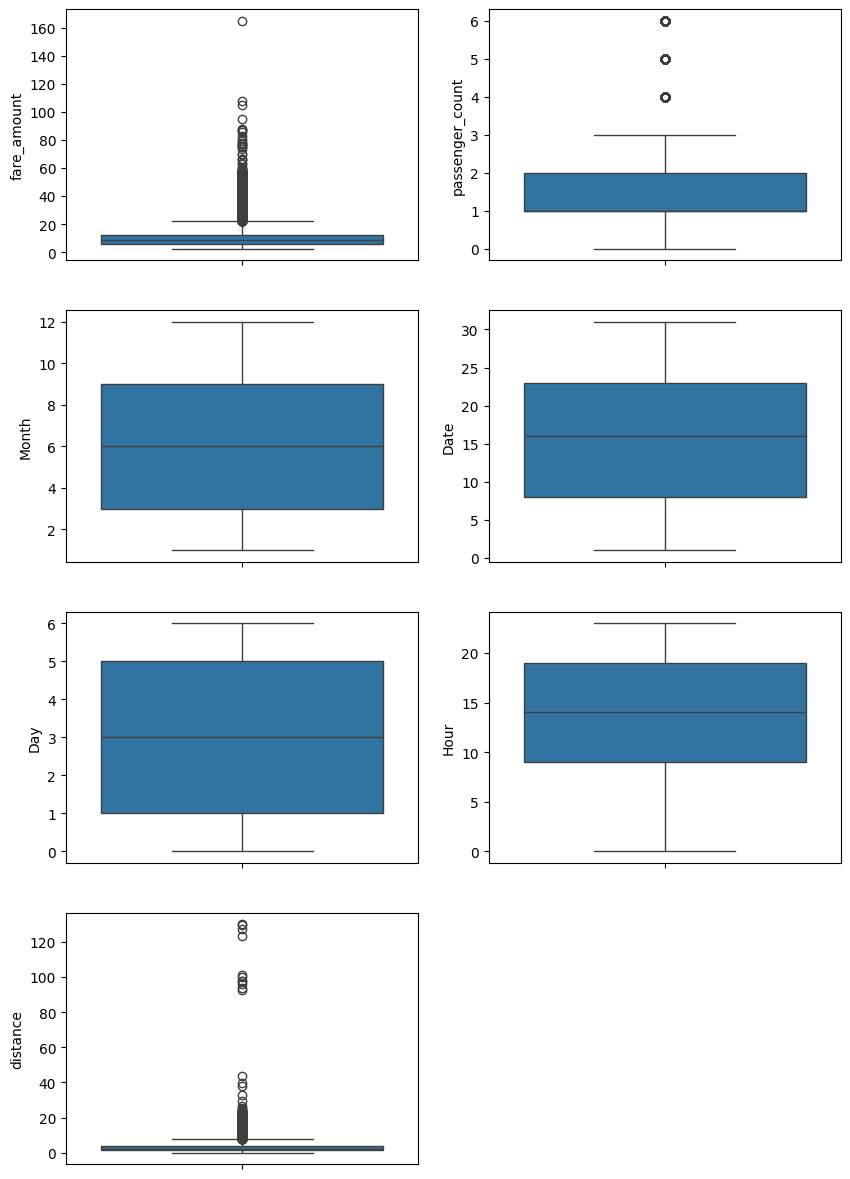

In [64]:
f, axes = plt.subplots(4,2,figsize=(10,15))
sns.boxplot(df['fare_amount'], ax=axes[0,0])
sns.boxplot(df['passenger_count'], ax=axes[0,1])
sns.boxplot(df['Month'], ax=axes[1,0])
sns.boxplot(df['Date'], ax=axes[1,1])
sns.boxplot(df['Day'], ax=axes[2,0])
sns.boxplot(df['Hour'], ax=axes[2,1])
sns.boxplot(df['distance'], ax=axes[3,0])
f.delaxes(axes[3][1])

In [65]:
df.shape

(15577, 7)

- In Box plots analysis of individual features, we can clearly observe from these boxplots that, not every feature contains outliers and many of them even have very few outliers. We have around 16k data-points and after removing the outliers, the data gets decreased by almost 15%. So, dropping the outliers is probably not the best idea.

- Instead we will fill them with NA, that means we have created ‘missing values’ in place of outliers within the data.

- Now We can treat these outliers like missing values and impute them using standard imputation techniques. In our case, we use Median imputation to impute these missing values.

In [66]:
def outliers_analysis(df):
    for i in df.columns:
        #print(i)
        q75, q25 = np.percentile(df.loc[:,i],[75,25])
        iqr= q75 - q25

        min=q25-1.5*(iqr)
        max=q75+1.5*(iqr)
        #print('Min',min)
        #print("max",max)

        df = df.drop(df[df.loc[:,i]< min].index)
        df = df.drop(df[df.loc[:,i]> max].index)
    return(df)

In [67]:
df[df!= 0]

,fare_amount,passenger_count,Month,Date,Day,Hour,distance
0,4.5,1.0,6,15,NaN,17.0,1.030764
1,16.9,1.0,1,5,1.0,16.0,8.450134
2,5.7,2.0,8,18,3.0,NaN,1.389525
3,7.7,1.0,4,21,5.0,4.0,2.799270
4,5.3,1.0,3,9,1.0,7.0,1.999157
...,...,...,...,...,...,...,...
16062,6.5,1.0,12,12,4.0,7.0,0.850044
16063,16.1,2.0,7,13,NaN,7.0,7.867638
16064,8.5,1.0,11,11,2.0,11.0,1.469105
16065,8.1,1.0,5,11,1.0,23.0,2.590036


In [68]:
df

,fare_amount,passenger_count,Month,Date,Day,Hour,distance
0,4.5,1,6,15,0,17,1.030764
1,16.9,1,1,5,1,16,8.450134
2,5.7,2,8,18,3,0,1.389525
3,7.7,1,4,21,5,4,2.799270
4,5.3,1,3,9,1,7,1.999157
...,...,...,...,...,...,...,...
16062,6.5,1,12,12,4,7,0.850044
16063,16.1,2,7,13,0,7,7.867638
16064,8.5,1,11,11,2,11,1.469105
16065,8.1,1,5,11,1,23,2.590036


In [69]:
df.median()

fare_amount         8.50000
passenger_count     1.00000
Month               6.00000
Date               16.00000
Day                 3.00000
Hour               14.00000
distance            2.19045
dtype: float64

In [70]:
def eliminate_rows_with_zero_value(df):
    df= df[df!= 0]
    df=df.fillna(df.median())
    return(df)

In [71]:
df.shape

(15577, 7)

In [72]:
train_cab.shape

(15577, 7)

In [73]:
train_cab

,fare_amount,passenger_count,Month,Date,Day,Hour,distance
0,4.5,1,6,15,0,17,1.030764
1,16.9,1,1,5,1,16,8.450134
2,5.7,2,8,18,3,0,1.389525
3,7.7,1,4,21,5,4,2.799270
4,5.3,1,3,9,1,7,1.999157
...,...,...,...,...,...,...,...
16062,6.5,1,12,12,4,7,0.850044
16063,16.1,2,7,13,0,7,7.867638
16064,8.5,1,11,11,2,11,1.469105
16065,8.1,1,5,11,1,23,2.590036


In [74]:
outliers_analysis(train_cab)

,fare_amount,passenger_count,Month,Date,Day,Hour,distance
0,4.5,1,6,15,0,17,1.030764
2,5.7,2,8,18,3,0,1.389525
3,7.7,1,4,21,5,4,2.799270
4,5.3,1,3,9,1,7,1.999157
5,12.1,1,1,6,3,9,3.787239
...,...,...,...,...,...,...,...
16061,10.9,1,5,20,2,18,3.357490
16062,6.5,1,12,12,4,7,0.850044
16064,8.5,1,11,11,2,11,1.469105
16065,8.1,1,5,11,1,23,2.590036


In [75]:
eliminate_rows_with_zero_value(train_cab)

,fare_amount,passenger_count,Month,Date,Day,Hour,distance
0,4.5,1.0,6,15,4.0,17.0,1.030764
1,16.9,1.0,1,5,1.0,16.0,8.450134
2,5.7,2.0,8,18,3.0,15.0,1.389525
3,7.7,1.0,4,21,5.0,4.0,2.799270
4,5.3,1.0,3,9,1.0,7.0,1.999157
...,...,...,...,...,...,...,...
16062,6.5,1.0,12,12,4.0,7.0,0.850044
16063,16.1,2.0,7,13,4.0,7.0,7.867638
16064,8.5,1.0,11,11,2.0,11.0,1.469105
16065,8.1,1.0,5,11,1.0,23.0,2.590036


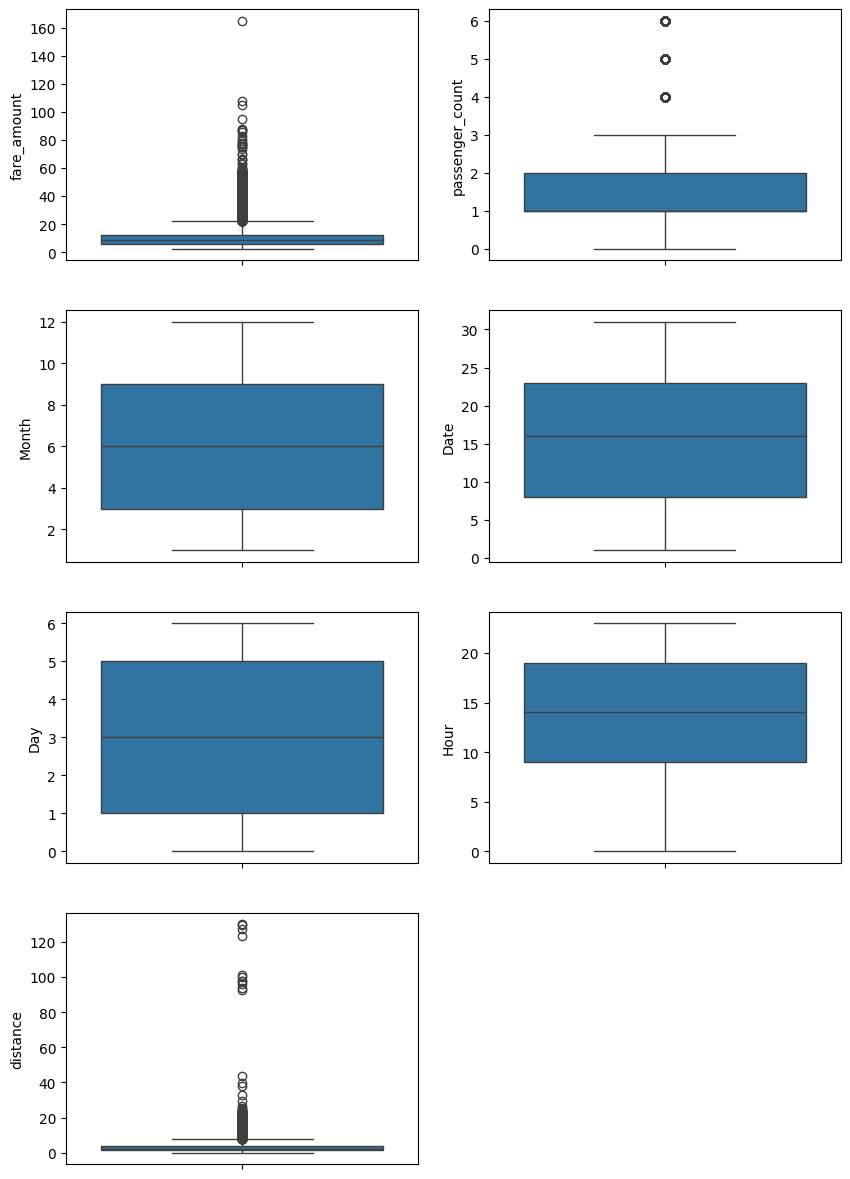

In [76]:
f, axes = plt.subplots(4,2,figsize=(10,15))
sns.boxplot(train_cab['fare_amount'], ax=axes[0,0])
sns.boxplot(train_cab['passenger_count'], ax=axes[0,1])
sns.boxplot(train_cab['Month'], ax=axes[1,0])
sns.boxplot(train_cab['Date'], ax=axes[1,1])
sns.boxplot(train_cab['Day'], ax=axes[2,0])
sns.boxplot(train_cab['Hour'], ax=axes[2,1])
sns.boxplot(train_cab['distance'], ax=axes[3,0])
f.delaxes(axes[3][1])

In [77]:
train_cab = outliers_analysis(train_cab)
train_cab = eliminate_rows_with_zero_value(train_cab)

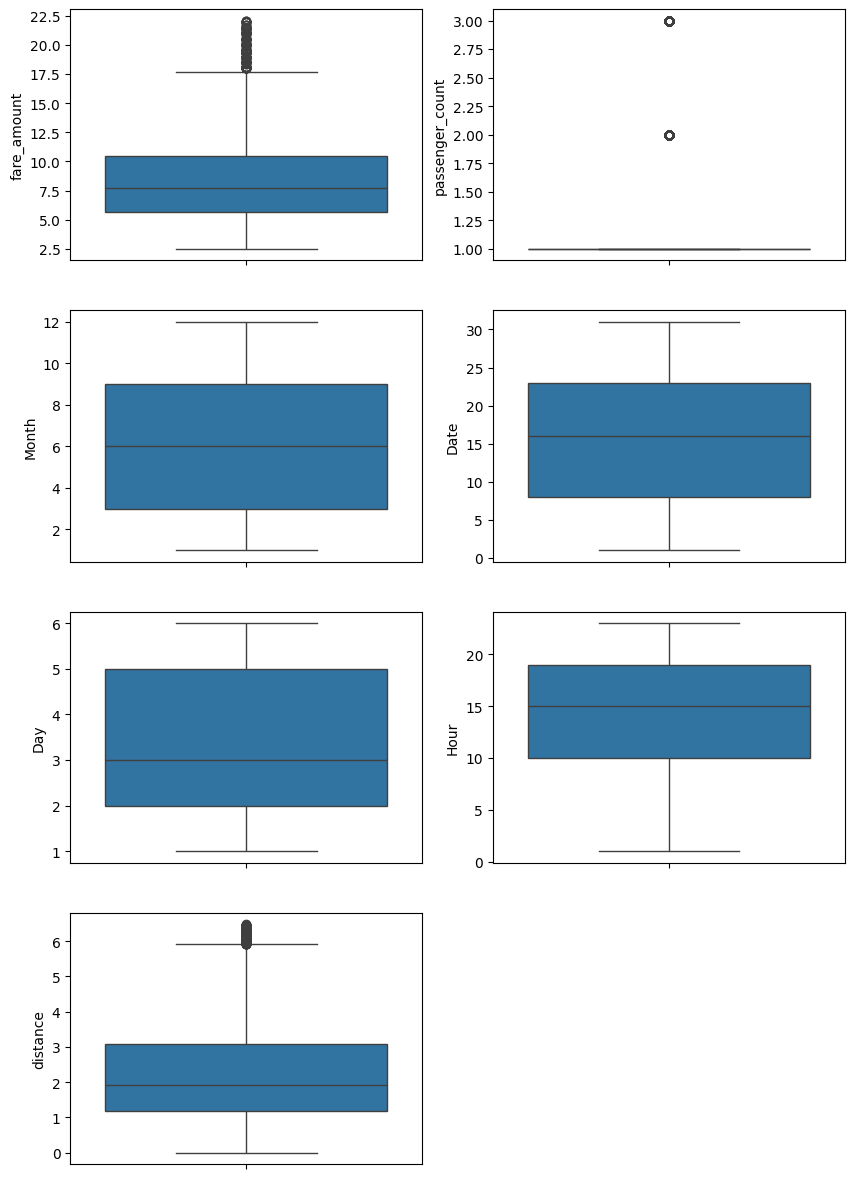

In [78]:
f, axes = plt.subplots(4,2,figsize=(10,15))
sns.boxplot(train_cab['fare_amount'], ax=axes[0,0])
sns.boxplot(train_cab['passenger_count'], ax=axes[0,1])
sns.boxplot(train_cab['Month'], ax=axes[1,0])
sns.boxplot(train_cab['Date'], ax=axes[1,1])
sns.boxplot(train_cab['Day'], ax=axes[2,0])
sns.boxplot(train_cab['Hour'], ax=axes[2,1])
sns.boxplot(train_cab['distance'], ax=axes[3,0])
f.delaxes(axes[3][1])

### Outlier Analysis in test data

<Axes: ylabel='distance'>

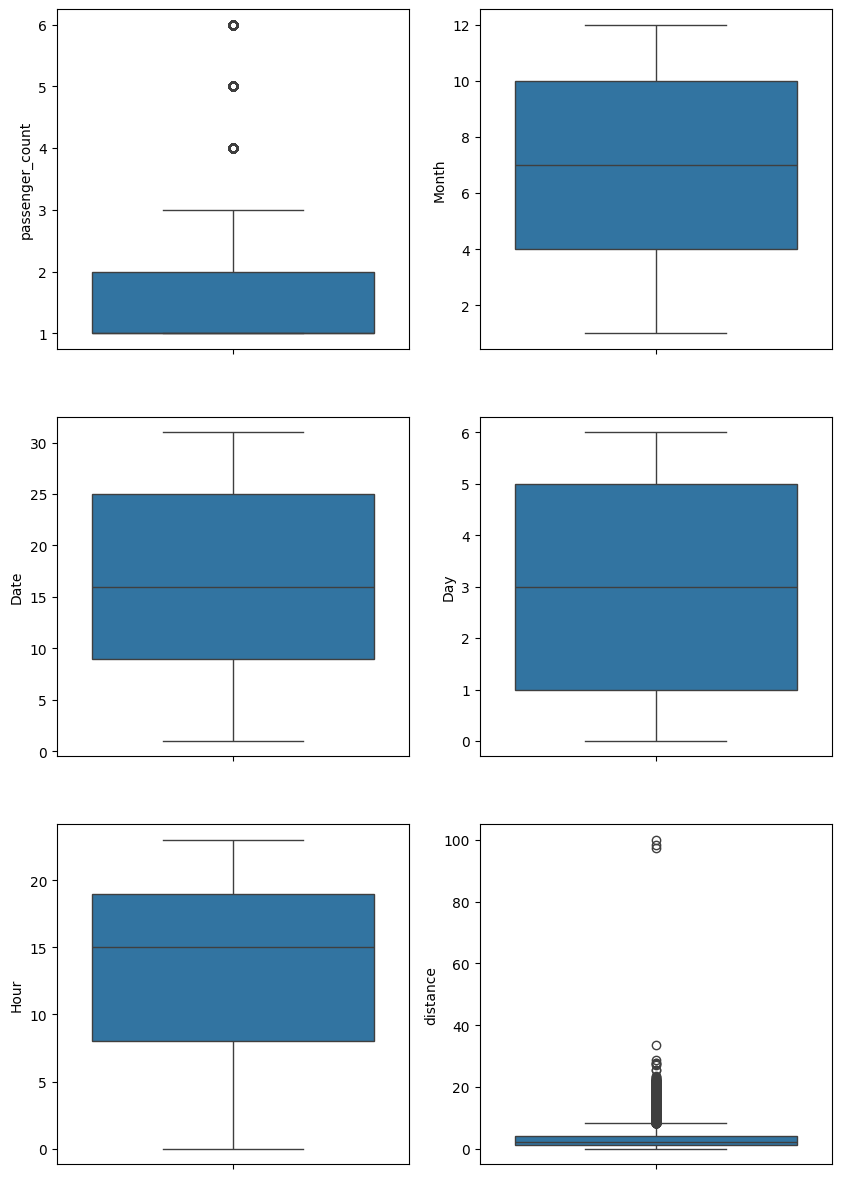

In [79]:
f, axes = plt.subplots(3,2,figsize=(10,15))
sns.boxplot(test_cab['passenger_count'], ax=axes[0,0])
sns.boxplot(test_cab['Month'], ax=axes[0,1])
sns.boxplot(test_cab['Date'], ax=axes[1,0])
sns.boxplot(test_cab['Day'], ax=axes[1,1])
sns.boxplot(test_cab['Hour'], ax=axes[2,0])
sns.boxplot(test_cab['distance'], ax=axes[2,1])

### There are outliers in test data as well mostly in distance and passanger count

In [80]:
test_cab = outliers_analysis(test_cab)
test_cab = eliminate_rows_with_zero_value(test_cab)

<Axes: ylabel='distance'>

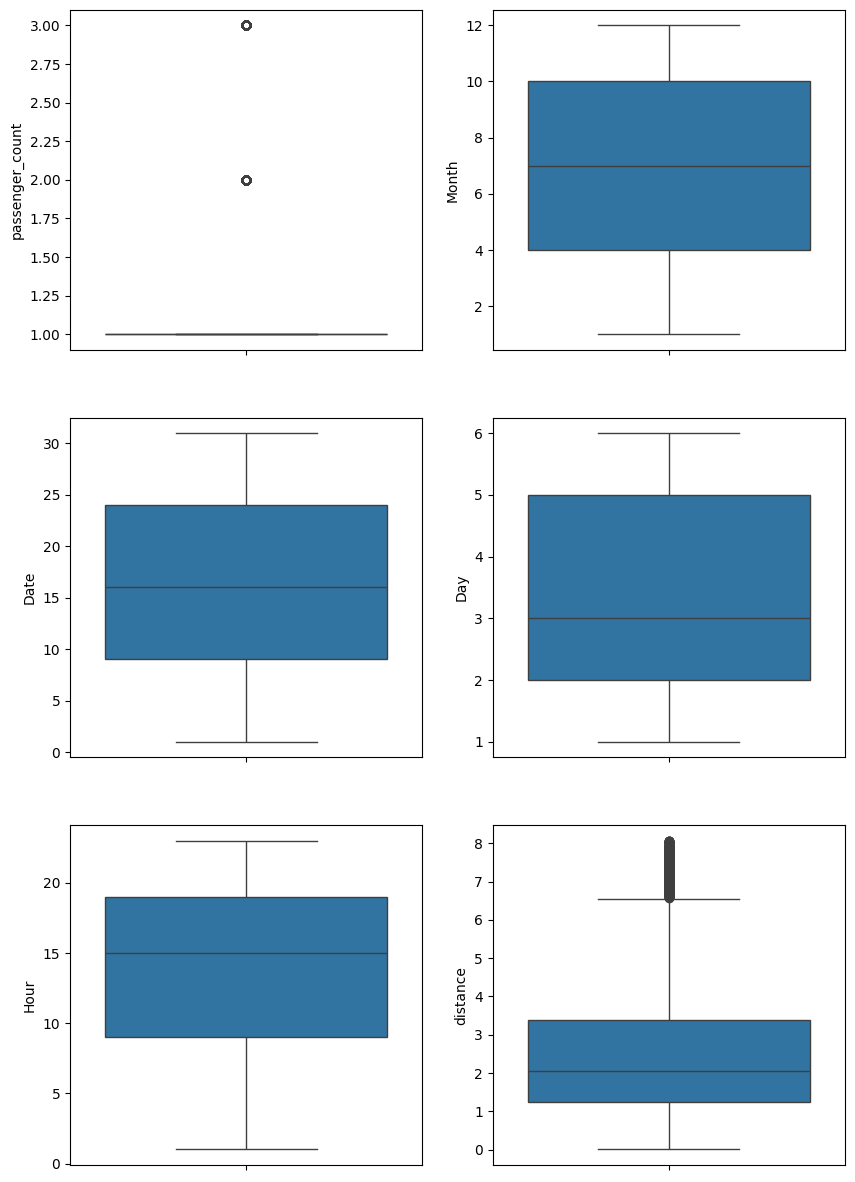

In [81]:
f, axes = plt.subplots(3,2,figsize=(10,15))
sns.boxplot(test_cab['passenger_count'], ax=axes[0,0])
sns.boxplot(test_cab['Month'], ax=axes[0,1])
sns.boxplot(test_cab['Date'], ax=axes[1,0])
sns.boxplot(test_cab['Day'], ax=axes[1,1])
sns.boxplot(test_cab['Hour'], ax=axes[2,0])
sns.boxplot(test_cab['distance'], ax=axes[2,1])

In [82]:
train_cab.shape

(12176, 7)

In [83]:
df.shape

(15577, 7)

In [84]:
train_cab=df

In [85]:
train_cab.shape

(15577, 7)

### Data Visualisation

<Axes: xlabel='passenger_count', ylabel='count'>

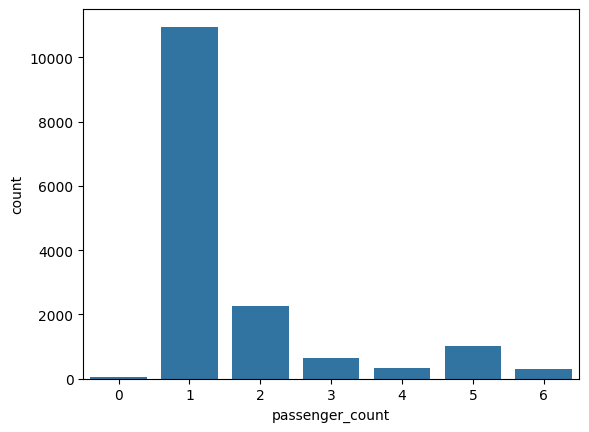

In [86]:
sns.countplot(x="passenger_count",data=train_cab)

In [87]:
train_cab = train_cab.drop(train_cab[train_cab['passenger_count']==0].index,axis=0)

<Axes: xlabel='passenger_count', ylabel='count'>

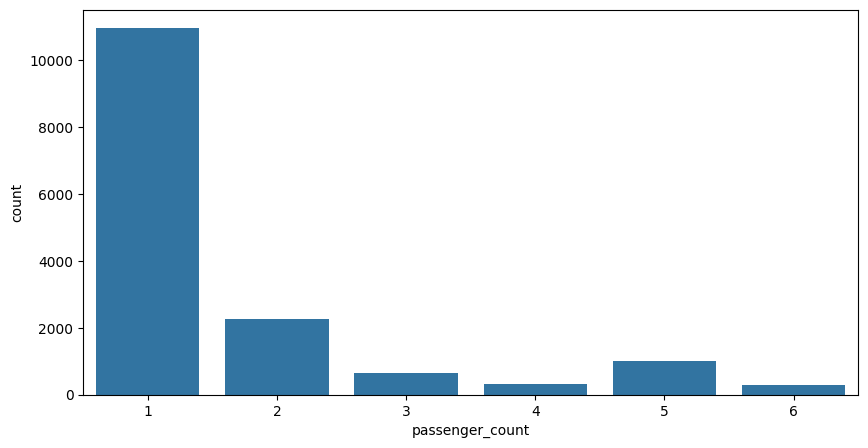

In [88]:
# Count plot on passenger count
plt.figure(figsize=(10,5))
sns.countplot(x="passenger_count",data=train_cab)

In [89]:
train_cab['passenger_count'].value_counts()

passenger_count
1    10953
2     2275
5     1022
3      658
4      319
6      296
Name: count, dtype: int64

### Relationship between number of passangers and Fare

Text(0, 0.5, 'Fare')

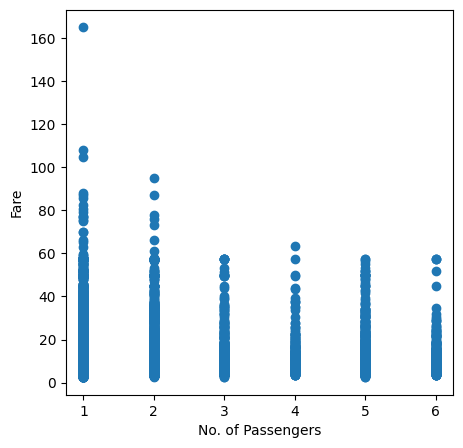

In [90]:
plt.figure(figsize=(5,5))
plt.scatter(train_cab['passenger_count'],train_cab['fare_amount'])
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

### Findings :
By seeing the Plots we can easily conclude that:
1. Single Travelling Passengers are most frequent Travellers.
2. At the sametime we can also Conclude that highest fare are coming from single & Double travelling passangers.

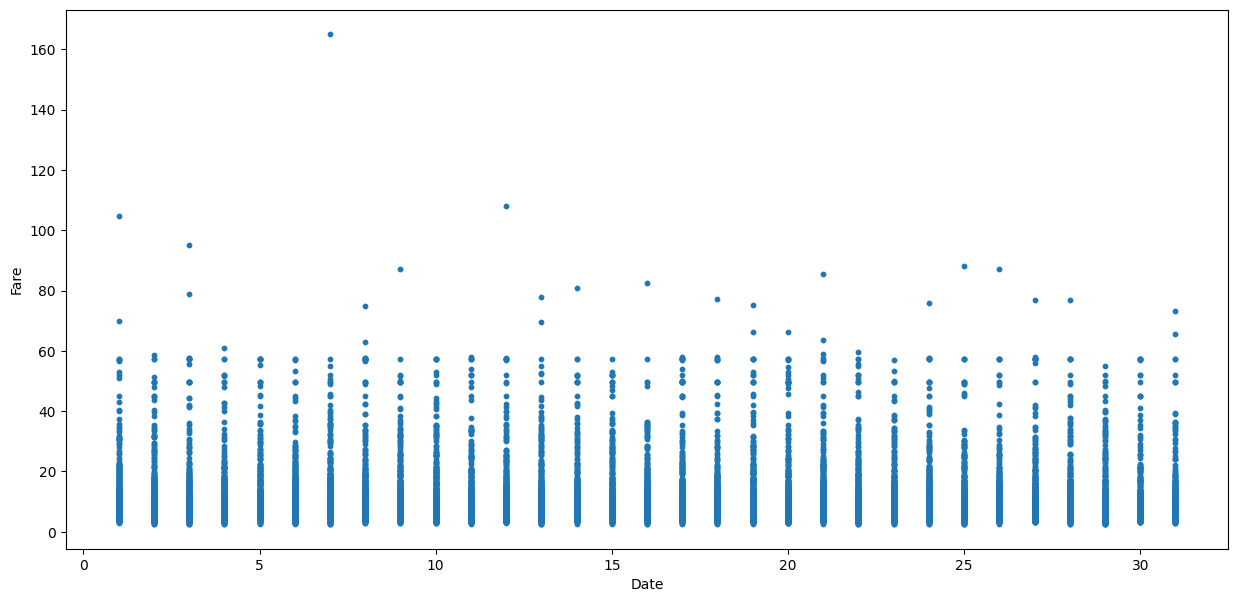

In [91]:
#Relationship between date and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['Date'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Date')
plt.ylabel('Fare')
plt.show()

<Axes: xlabel='Hour'>

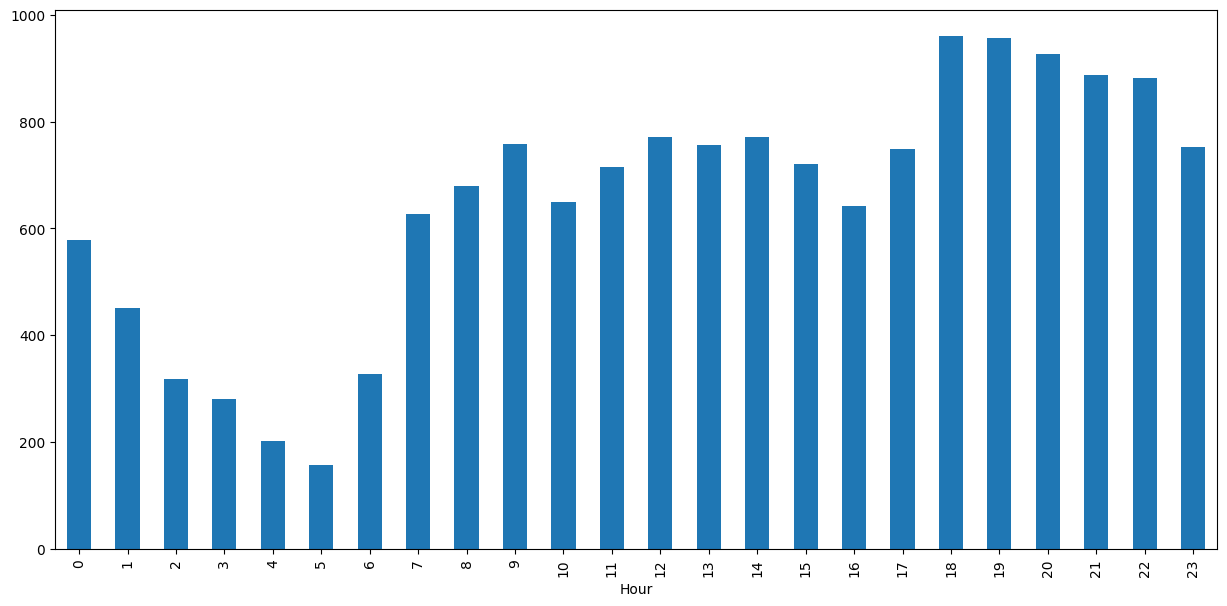

In [92]:
plt.figure(figsize=(15,7))
train_cab.groupby(train_cab["Hour"])['Hour'].count().plot(kind="bar")

#### Lowest Cabs at 5AM and Highest at Around 7PM At the Office Rush Hours

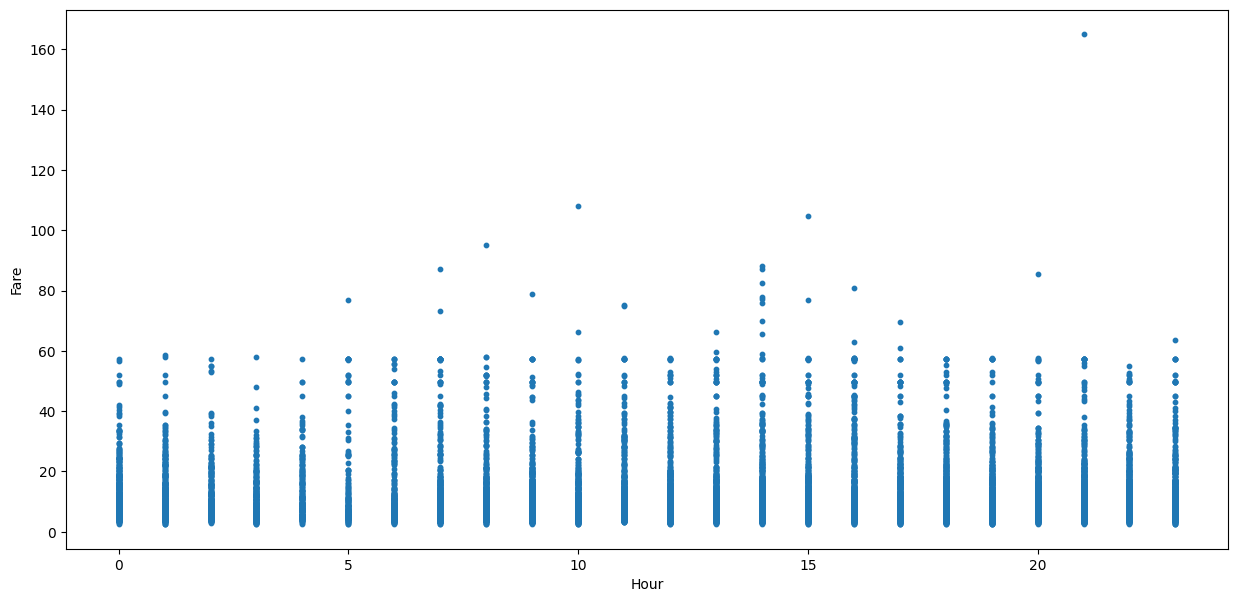

In [93]:
#Relationship between Time and Fare
plt.figure(figsize=(15,7))
plt.scatter(x=train_cab['Hour'], y=train_cab['fare_amount'], s=10)
plt.xlabel('Hour')
plt.ylabel('Fare')
plt.show()

#### From the Above Plot we can observe that the cabs taken at 7am and 23 pm are the Costliest. Hence we can assume that early in the morning and late at night are costliest

<Axes: xlabel='Day', ylabel='count'>

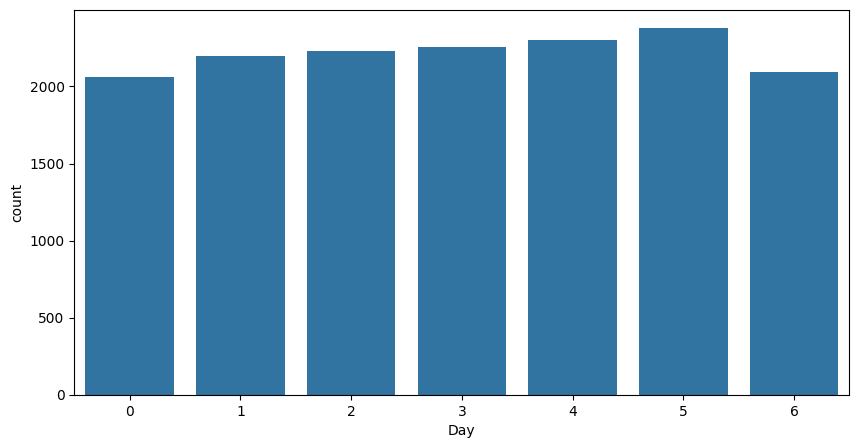

In [94]:
plt.figure(figsize=(10,5))
sns.countplot(x="Day",data=train_cab)

Observation : The day of the week does not seem to have much influence on the number of cabs ride

Text(0, 0.5, 'Fare')

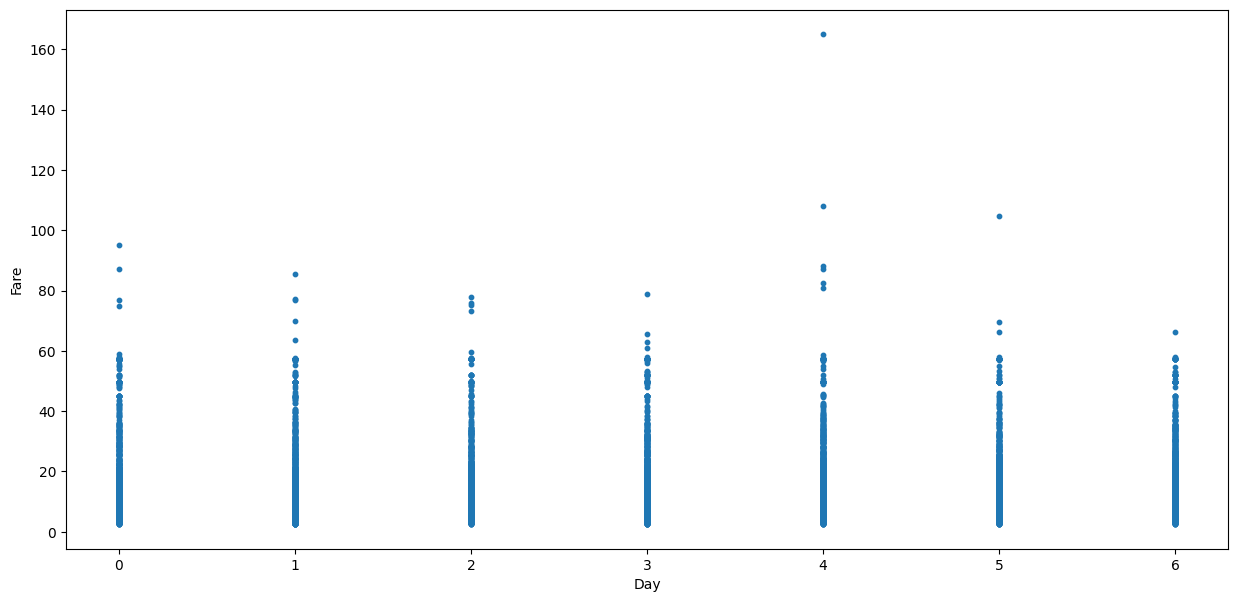

In [95]:
plt.figure(figsize=(15,7))
plt.scatter(x=train_cab["Day"],y=train_cab['fare_amount'],s=10)
plt.xlabel('Day')
plt.ylabel('Fare')

- The Highest fares seem to be on Sunday, Monday and Thursday, and the Low on Tuesday and Saturday. May be Due to low demand of the cabs on Saturdays the cab fare is low and high demand of cabs on Sunday and Monday shows the high Fare Price

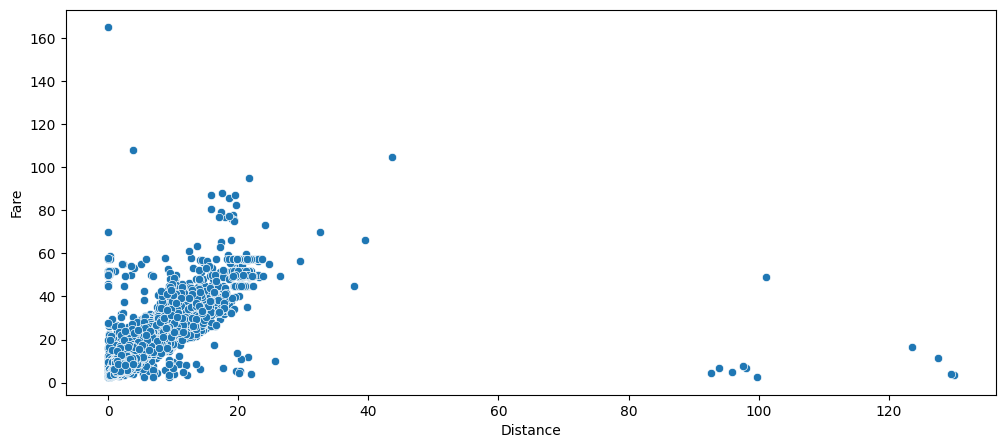

In [96]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=train_cab['distance'],y=train_cab['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('Fare')
plt.show()

### Correlation Analysis

Correlation helps to understand relationships between different attributes of the data Since we have to predict the Fare amount. correlations helps us understand and exploit relationships to build better Models

In [97]:
train_cab.corr()

,fare_amount,passenger_count,Month,Date,Day,Hour,distance
fare_amount,1.000000,0.010084,0.041255,-0.007385,0.002744,-0.031709,0.691565
passenger_count,0.010084,1.000000,0.008576,0.002750,0.042338,0.019356,-0.001772
Month,0.041255,0.008576,1.000000,-0.017609,-0.015611,-0.004502,0.012403
Date,-0.007385,0.002750,-0.017609,1.000000,0.013374,0.001469,-0.004630
Day,0.002744,0.042338,-0.015611,0.013374,1.000000,-0.088372,0.014554
Hour,-0.031709,0.019356,-0.004502,0.001469,-0.088372,1.000000,-0.029700
distance,0.691565,-0.001772,0.012403,-0.004630,0.014554,-0.029700,1.000000


### Its better to understand Visually correlation

<Axes: >

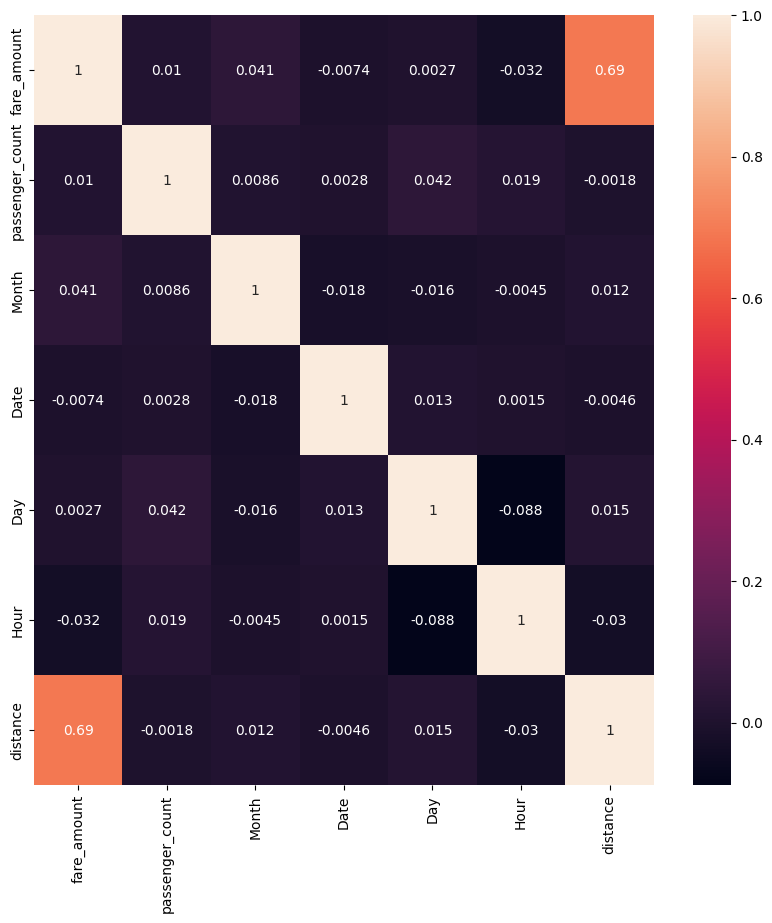

In [98]:
plt.figure(figsize=(10,10))
corr = train_cab.corr()
sns.heatmap(corr,annot=True)

<Axes: >

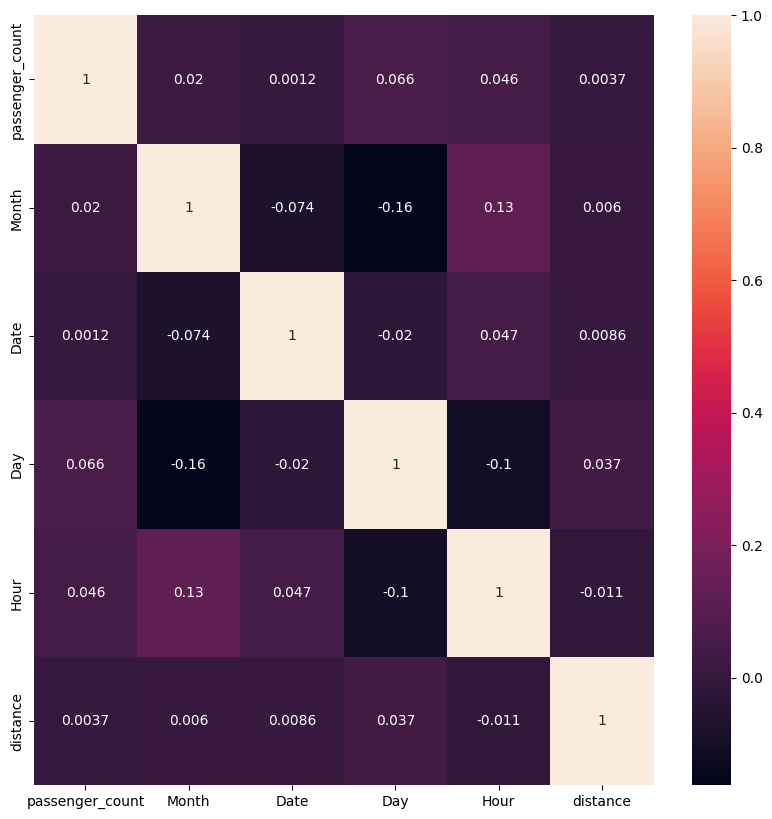

In [99]:
plt.figure(figsize=(10,10))
corr_test = test_cab.corr()
sns.heatmap(corr_test,annot=True)

1. Value of correlation is between -1 to 1. So any value close to -1 or 1 will have higher correaltion.
2. in Our train and test data we dont have more then 0.4 in positive direction and nothing less then -0.1 in negative Direction

#### Feature Scaling
Using the raw values as input featues might makes models biased towards features that are in high vlaues.
It is recommended to normalize and scale down the features with feaure scaling

#### Normalisation

Normalization rescales the values into a range of [0,1].

Text(0.5, 1.0, 'Distribution for Variable Fare amount')

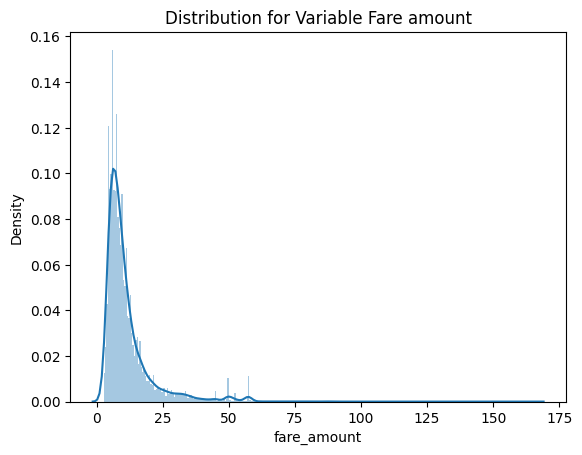

In [100]:
# Normality check of training data

sns.distplot(train_cab['fare_amount'],bins='auto')
plt.title("Distribution for Variable Fare amount")

Text(0.5, 1.0, 'Distribution for Variable distance')

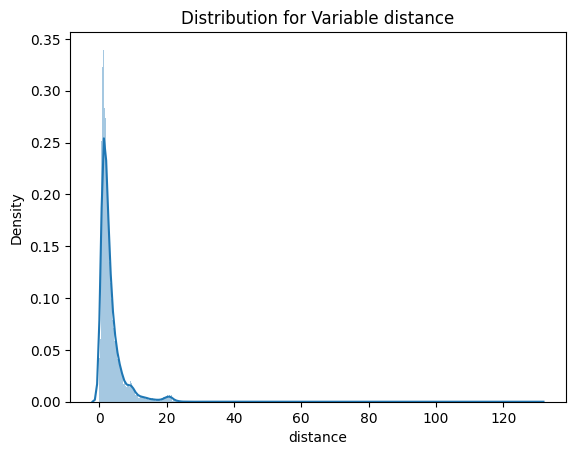

In [101]:
sns.distplot(train_cab['distance'],bins='auto')
plt.title("Distribution for Variable distance")

In [102]:
train_cab['distance']

0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
           ...   
16062    0.850044
16063    7.867638
16064    1.469105
16065    2.590036
16066    3.898113
Name: distance, Length: 15523, dtype: float64

In [103]:
train_cab['fare_amount']

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
16062     6.5
16063    16.1
16064     8.5
16065     8.1
16066     8.5
Name: fare_amount, Length: 15523, dtype: float64

In [104]:
train_cab['distance'] = np.log1p(train_cab['distance'])
train_cab['fare_amount'] = np.log1p(train_cab['fare_amount'])

In [105]:
train_cab['distance']

0        0.708412
1        2.246029
2        0.871095
3        1.334809
4        1.098331
           ...   
16062    0.615210
16063    2.182408
16064    0.903856
16065    1.278162
16066    1.588850
Name: distance, Length: 15523, dtype: float64

In [106]:
train_cab['fare_amount']

0        1.704748
1        2.884801
2        1.902108
3        2.163323
4        1.840550
           ...   
16062    2.014903
16063    2.839078
16064    2.251292
16065    2.208274
16066    2.251292
Name: fare_amount, Length: 15523, dtype: float64

Text(0.5, 1.0, 'Distribution for Variable Fare amount')

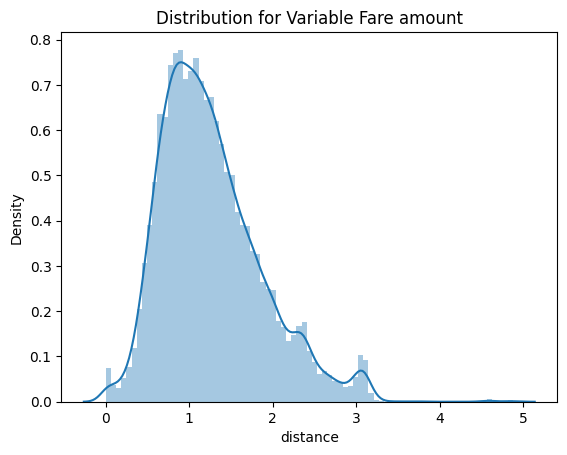

In [107]:
sns.distplot(train_cab['distance'],bins='auto')
plt.title("Distribution for Variable Fare amount")

We can see now its tranformed into bell curve. our continoues variables are now normally distributed, we will not use any feature scaling method now

Text(0.5, 1.0, 'Distribution for Variable Distance')

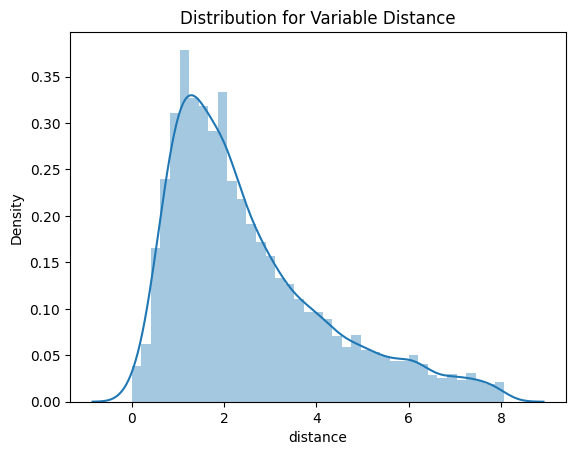

In [108]:
sns.distplot(test_cab['distance'],bins='auto')
plt.title("Distribution for Variable Distance")

In [109]:
test_cab['distance'].sort_values(ascending=False).head(50)

7613    8.070494
2960    8.062238
2115    8.055160
1002    8.052465
8220    8.050647
2166    8.046091
474     8.042633
4629    8.041961
2705    8.037824
6100    8.037112
636     8.029018
4100    8.017470
2119    7.997599
7288    7.992964
7102    7.987308
7014    7.964359
5864    7.961390
3035    7.958119
5853    7.952844
4446    7.940626
8191    7.931091
7946    7.915610
157     7.914353
4365    7.912545
7803    7.910109
4347    7.892739
5164    7.892282
6864    7.891832
7700    7.885060
5569    7.877213
8110    7.877029
1885    7.876604
2931    7.875147
6894    7.871975
5894    7.865900
407     7.864122
2781    7.854857
4832    7.850921
3845    7.844752
7527    7.844143
5243    7.823660
4511    7.823210
7775    7.815325
1082    7.809877
5914    7.809798
4611    7.808399
1447    7.794401
1966    7.782724
7910    7.775635
2933    7.760537
Name: distance, dtype: float64

In [110]:
test_cab['distance'] =np.log1p(test_cab['distance'])

Text(0.5, 1.0, 'Distribution for Variable Distance')

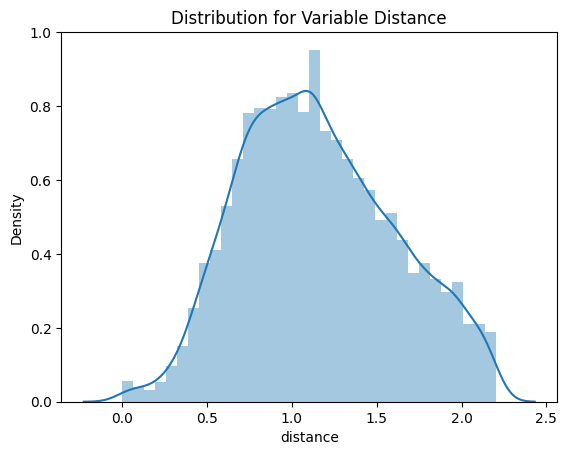

In [111]:
sns.distplot(test_cab['distance'],bins='auto')
plt.title("Distribution for Variable Distance")

### Splitting Data into train test

In [112]:
X = train_cab.drop('fare_amount',axis=1)
y = train_cab['fare_amount']

### Importing Libraries

In [151]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12)

In [115]:
print("X_train :",X_train.shape) 
print('y_train :',y_train.shape)
print("X_test  :",X_test.shape)
print('y_test  :',y_test.shape)

X_train : (13194, 6)
y_train : (13194,)
X_test  : (2329, 6)
y_test  : (2329,)


### Linear Regression

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
LR_model = LinearRegression().fit(X_train,y_train)

In [118]:
# Prediction on train data
lr_pred_train = LR_model.predict(X_train)

In [119]:
# Prediction on train data
lr_pred_test = LR_model.predict(X_test)

In [148]:
#evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [121]:
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, lr_pred_test))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, lr_pred_train))

print("Root Mean Squared Error For Train data = "+str(RMSE_train_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

Root Mean Squared Error For Train data = 0.2727583620557529
Root Mean Squared Error For Test data = 0.27263387891012836


In [122]:
#calculate R^2 for train data
r2_score(y_train, lr_pred_train)

0.7479070288201279

In [123]:
r2_score(y_test, lr_pred_test)

0.7447215094303845

### Decision Tree

In [124]:
#from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor 

In [125]:
#Model
DT_model = DecisionTreeRegressor(max_depth=5).fit(X_train,y_train)

In [126]:
# Prediction on train data
pred_train_DT = DT_model.predict(X_train)

In [127]:
# Prediction on test data
pred_test_DT = DT_model.predict(X_test)

In [128]:
##calculating RMSE for train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

##calculating RMSE for test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_DT))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_DT))

Root Mean Squared Error For Training data = 0.24450772100781962
Root Mean Squared Error For Test data = 0.25807781012076686


In [129]:
## R2 calculation for train data
r2_score(y_train,pred_train_DT)

0.7974231821605953

In [130]:
## R2 calculation for test data
r2_score(y_test,pred_test_DT)

0.7712527361369927

## Random Forest

In [131]:
from sklearn.ensemble import RandomForestRegressor

In [132]:
model_rf = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

In [133]:
pred_train_rf = model_rf.predict(X_train)

In [134]:
pred_test_rf = model_rf.predict(X_test)

In [135]:
rmse_train_rf = np.sqrt(mean_squared_error(y_train,pred_train_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test,pred_test_rf))
print("Root Mean Squared Error For Training data = "+str(rmse_train_rf))
print("Root Mean Squared Error For Test data = "+str(rmse_test_rf))

Root Mean Squared Error For Training data = 0.0959611542788097
Root Mean Squared Error For Test data = 0.2660305181155981


In [136]:
# Training r2 Score
r2_score(y_train,pred_train_rf)

0.9687970600075181

In [137]:
r2_score(y_test,pred_test_rf)

0.7569377584494817

In [138]:
np.exp(model_rf.predict(test_cab))

array([10.18892574, 10.92308849,  5.72953092, ..., 17.93881186,
        5.85711379,  8.31627244])

In [139]:
test_cab

,passenger_count,Month,Date,Day,Hour,distance
0,1,1,27,1.0,13.0,1.200946
1,1,1,27,1.0,13.0,1.231205
2,1,10,8,5.0,11.0,0.481579
3,1,12,1,5.0,21.0,1.085538
4,1,12,1,5.0,21.0,1.854312
...,...,...,...,...,...,...
8830,3,2,2,5.0,16.0,1.698590
8831,3,4,5,5.0,1.0,1.285323
8832,3,4,5,5.0,1.0,2.000752
8833,3,2,23,1.0,20.0,0.647069


In [140]:
DT_model.predict([[2,4,24,5,23,1.4]])

array([2.41846941])

In [149]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=100)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results.append({"Model": name, "R2 Score": r2, "RMSE": rmse, "MAE": mae})

results_df = pd.DataFrame(results)

In [150]:
results_df

,Model,R2 Score,RMSE,MAE
0,Linear Regression,0.744722,0.272634,0.182189
1,Decision Tree,0.771253,0.258078,0.176392
2,Random Forest,0.761535,0.263503,0.180439


In [145]:
results_df

,Model,Accuracy
0,Linear Regression,0.744722
1,Decision Tree,0.523446
2,Random Forest,0.761304


In [141]:
#import pickle

In [142]:
#pickle.dump(DT_model, open("model.pkl", "wb"))